In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

In [2]:
pip install matplotlib==3.1.1

In [3]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [4]:
df = pd.read_excel("/content/Kindinger data_Uploaded PlosOne.xls")
df.head()

,Unnamed: 0,Unnamed: 1,Gesational age at CL (mm),Unnamed: 3,Unnamed: 4,Unnamed: 5,,Unnamed: 7
0,Age,Ethnicity,13+0-15+6 weeks,16+0–18+6 weeks,20+0-22+6 weeks,Gestation at spon delivery,Preterm,Cerclage
1,40.688889,black,31,31,30,41,term,no cerclage
2,20,black,33,32,32,38,term,no cerclage
3,33.338889,black,34,32,38,40,term,no cerclage
4,34.963889,caucasian,33,33,36,39,term,no cerclage


In [5]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Gesational age at CL (mm)', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', ' ', 'Unnamed: 7'],
      dtype='object')

In [6]:
df1=df.rename(columns={'Unnamed: 0':'Age','Unnamed: 1':'Ethnicity','Gesational age at CL (mm)':'13+0-15+6 weeks','Unnamed: 3':'16+0–18+6 weeks','Unnamed: 4':'20+0-22+6 weeks','Unnamed: 5':'Gestation at spon delivery',' ':'Preterm','Unnamed: 7':'Cerclage'})

In [7]:
df1.head()

,Age,Ethnicity,13+0-15+6 weeks,16+0–18+6 weeks,20+0-22+6 weeks,Gestation at spon delivery,Preterm,Cerclage
0,Age,Ethnicity,13+0-15+6 weeks,16+0–18+6 weeks,20+0-22+6 weeks,Gestation at spon delivery,Preterm,Cerclage
1,40.688889,black,31,31,30,41,term,no cerclage
2,20,black,33,32,32,38,term,no cerclage
3,33.338889,black,34,32,38,40,term,no cerclage
4,34.963889,caucasian,33,33,36,39,term,no cerclage


In [8]:
df1.drop(index=0,inplace=True)

In [9]:
df1.head()

,Age,Ethnicity,13+0-15+6 weeks,16+0–18+6 weeks,20+0-22+6 weeks,Gestation at spon delivery,Preterm,Cerclage
1,40.688889,black,31,31,30,41,term,no cerclage
2,20,black,33,32,32,38,term,no cerclage
3,33.338889,black,34,32,38,40,term,no cerclage
4,34.963889,caucasian,33,33,36,39,term,no cerclage
5,21.816667,caucasian,34,36,33,41,term,no cerclage


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 1 to 730
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         727 non-null    object
 1   Ethnicity                   727 non-null    object
 2   13+0-15+6 weeks             726 non-null    object
 3   16+0–18+6 weeks             644 non-null    object
 4   20+0-22+6 weeks             725 non-null    object
 5   Gestation at spon delivery  726 non-null    object
 6   Preterm                     725 non-null    object
 7   Cerclage                    725 non-null    object
dtypes: object(8)
memory usage: 45.8+ KB


In [11]:
df1.shape

(730, 8)

In [12]:
categorial_cols = [col for col in df1.columns if df1[col].dtype=="object"]
categorial_cols

['Age',
 'Ethnicity',
 '13+0-15+6 weeks',
 '16+0–18+6 weeks',
 '20+0-22+6 weeks',
 'Gestation at spon delivery',
 'Preterm',
 'Cerclage']

In [13]:
df1.drop_duplicates(inplace = True)

In [14]:
df1.isnull().sum()

Age                            2
Ethnicity                      2
13+0-15+6 weeks                3
16+0–18+6 weeks               85
20+0-22+6 weeks                4
Gestation at spon delivery     3
Preterm                        4
Cerclage                       4
dtype: int64

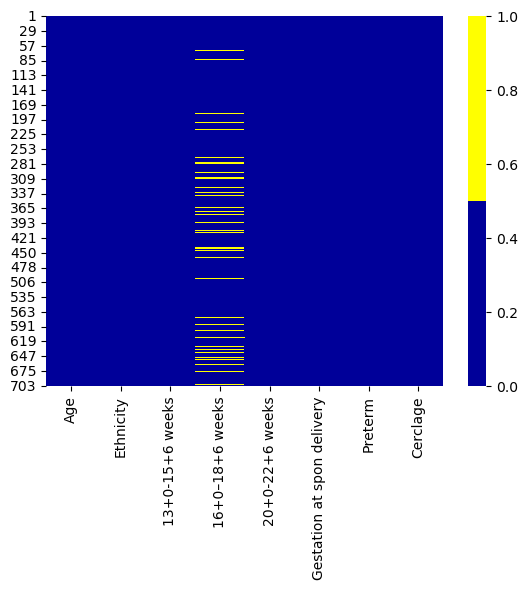

In [15]:
cols =df1.columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df1[cols].isnull(), cmap=sns.color_palette(colours))

In [16]:
# Here I calculate the percentage of missing data in each column.
# % of missing.
for col in df1.columns:
    pct_missing = np.mean(df1[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Age - 0%
Ethnicity - 0%
13+0-15+6 weeks - 0%
16+0–18+6 weeks - 12%
20+0-22+6 weeks - 1%
Gestation at spon delivery - 0%
Preterm - 1%
Cerclage - 1%


In [17]:
df1.shape

(727, 8)

In [18]:
df1['Ethnicity'].value_counts()

Ethnicity
caucasian    374
asian        169
black        141
no data       39
               2
Name: count, dtype: int64

In [19]:
df1['Age'].value_counts()

Age
no data               37
34                    35
32                    35
36                    34
35                    34
                      ..
38.98888888888889      1
37.42777777777778      1
26.59722222222222      1
34.24444444444445      1
31.666666666666668     1
Name: count, Length: 262, dtype: int64

In [20]:
df1.shape

(727, 8)

In [21]:
df1

,Age,Ethnicity,13+0-15+6 weeks,16+0–18+6 weeks,20+0-22+6 weeks,Gestation at spon delivery,Preterm,Cerclage
1,40.688889,black,31,31,30,41,term,no cerclage
2,20,black,33,32,32,38,term,no cerclage
3,33.338889,black,34,32,38,40,term,no cerclage
4,34.963889,caucasian,33,33,36,39,term,no cerclage
5,21.816667,caucasian,34,36,33,41,term,no cerclage
...,...,...,...,...,...,...,...,...
725,33,caucasian,31,30,29,40,term,no cerclage
726,,,,NaN,NaN,NaN,NaN,NaN
727,,,NaN,NaN,NaN,NaN,NaN,NaN
728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df1.isnull().sum()

Age                            2
Ethnicity                      2
13+0-15+6 weeks                3
16+0–18+6 weeks               85
20+0-22+6 weeks                4
Gestation at spon delivery     3
Preterm                        4
Cerclage                       4
dtype: int64

In [23]:
df1.dtypes

Age                           object
Ethnicity                     object
13+0-15+6 weeks               object
16+0–18+6 weeks               object
20+0-22+6 weeks               object
Gestation at spon delivery    object
Preterm                       object
Cerclage                      object
dtype: object

In [24]:
cols = ['Age','13+0-15+6 weeks', '16+0–18+6 weeks','20+0-22+6 weeks','Gestation at spon delivery']
df1[cols] = df1[cols].apply(pd.to_numeric, errors='coerce', axis=1)


In [25]:
df1

,Age,Ethnicity,13+0-15+6 weeks,16+0–18+6 weeks,20+0-22+6 weeks,Gestation at spon delivery,Preterm,Cerclage
1,40.688889,black,31.0,31.0,30.0,41.0,term,no cerclage
2,20.000000,black,33.0,32.0,32.0,38.0,term,no cerclage
3,33.338889,black,34.0,32.0,38.0,40.0,term,no cerclage
4,34.963889,caucasian,33.0,33.0,36.0,39.0,term,no cerclage
5,21.816667,caucasian,34.0,36.0,33.0,41.0,term,no cerclage
...,...,...,...,...,...,...,...,...
725,33.000000,caucasian,31.0,30.0,29.0,40.0,term,no cerclage
726,NaN,,NaN,NaN,NaN,NaN,NaN,NaN
727,NaN,,NaN,NaN,NaN,NaN,NaN,NaN
728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df1.dtypes

Age                           float64
Ethnicity                      object
13+0-15+6 weeks               float64
16+0–18+6 weeks               float64
20+0-22+6 weeks               float64
Gestation at spon delivery    float64
Preterm                        object
Cerclage                       object
dtype: object

In [27]:
df1 = df1.interpolate()
df1

,Age,Ethnicity,13+0-15+6 weeks,16+0–18+6 weeks,20+0-22+6 weeks,Gestation at spon delivery,Preterm,Cerclage
1,40.688889,black,31.0,31.0,30.0,41.0,term,no cerclage
2,20.000000,black,33.0,32.0,32.0,38.0,term,no cerclage
3,33.338889,black,34.0,32.0,38.0,40.0,term,no cerclage
4,34.963889,caucasian,33.0,33.0,36.0,39.0,term,no cerclage
5,21.816667,caucasian,34.0,36.0,33.0,41.0,term,no cerclage
...,...,...,...,...,...,...,...,...
725,33.000000,caucasian,31.0,30.0,29.0,40.0,term,no cerclage
726,33.000000,,31.0,30.0,29.0,35.5,NaN,NaN
727,33.000000,,31.0,30.0,29.0,31.0,NaN,NaN
728,33.000000,NaN,31.0,30.0,29.0,26.5,NaN,NaN


In [28]:
df1.head(20)

,Age,Ethnicity,13+0-15+6 weeks,16+0–18+6 weeks,20+0-22+6 weeks,Gestation at spon delivery,Preterm,Cerclage
1,40.688889,black,31.0,31.0,30.0,41.0,term,no cerclage
2,20.000000,black,33.0,32.0,32.0,38.0,term,no cerclage
3,33.338889,black,34.0,32.0,38.0,40.0,term,no cerclage
4,34.963889,caucasian,33.0,33.0,36.0,39.0,term,no cerclage
5,21.816667,caucasian,34.0,36.0,33.0,41.0,term,no cerclage
6,28.000000,black,28.0,28.0,27.0,33.0,Preterm,no cerclage
7,34.744444,caucasian,29.0,28.0,29.0,39.0,term,no cerclage
8,20.516667,black,38.0,32.0,31.0,39.0,term,no cerclage
9,34.000000,caucasian,37.0,32.0,32.0,38.0,term,no cerclage
10,34.194444,black,32.0,29.0,29.0,40.0,term,no cerclage


In [29]:
df1.tail(20)

,Age,Ethnicity,13+0-15+6 weeks,16+0–18+6 weeks,20+0-22+6 weeks,Gestation at spon delivery,Preterm,Cerclage
710,44.000000,asian,37.000000,38.000000,34.111111,41.0,term,no cerclage
711,38.000000,asian,32.700000,33.666667,35.666667,40.0,term,no cerclage
712,37.666667,caucasian,44.033333,43.033333,34.833333,40.0,term,no cerclage
713,37.333333,asian,22.000000,39.811111,34.000000,38.0,term,cerclage
714,37.000000,asian,38.666667,36.588889,33.166667,41.0,term,no cerclage
715,46.000000,caucasian,32.900000,33.366667,32.333333,39.0,term,no cerclage
716,35.000000,caucasian,30.500000,35.500000,37.000000,39.0,term,no cerclage
717,30.000000,caucasian,30.000000,33.333333,35.000000,34.0,Preterm,no cerclage
718,34.000000,asian,36.050000,31.166667,33.000000,40.0,term,no cerclage
719,44.000000,asian,32.333333,29.000000,31.000000,41.0,term,no cerclage


In [30]:
df1.drop_duplicates(inplace = True)

In [31]:
df1.shape

(727, 8)

In [32]:
df1.tail(20)

,Age,Ethnicity,13+0-15+6 weeks,16+0–18+6 weeks,20+0-22+6 weeks,Gestation at spon delivery,Preterm,Cerclage
710,44.000000,asian,37.000000,38.000000,34.111111,41.0,term,no cerclage
711,38.000000,asian,32.700000,33.666667,35.666667,40.0,term,no cerclage
712,37.666667,caucasian,44.033333,43.033333,34.833333,40.0,term,no cerclage
713,37.333333,asian,22.000000,39.811111,34.000000,38.0,term,cerclage
714,37.000000,asian,38.666667,36.588889,33.166667,41.0,term,no cerclage
715,46.000000,caucasian,32.900000,33.366667,32.333333,39.0,term,no cerclage
716,35.000000,caucasian,30.500000,35.500000,37.000000,39.0,term,no cerclage
717,30.000000,caucasian,30.000000,33.333333,35.000000,34.0,Preterm,no cerclage
718,34.000000,asian,36.050000,31.166667,33.000000,40.0,term,no cerclage
719,44.000000,asian,32.333333,29.000000,31.000000,41.0,term,no cerclage


In [33]:
df1.isnull().sum()

Age                           0
Ethnicity                     2
13+0-15+6 weeks               0
16+0–18+6 weeks               0
20+0-22+6 weeks               0
Gestation at spon delivery    0
Preterm                       4
Cerclage                      4
dtype: int64

In [34]:
df1=df1.dropna()

In [35]:
df1.shape

(723, 8)

In [36]:
df1.isnull().sum()

Age                           0
Ethnicity                     0
13+0-15+6 weeks               0
16+0–18+6 weeks               0
20+0-22+6 weeks               0
Gestation at spon delivery    0
Preterm                       0
Cerclage                      0
dtype: int64

In [37]:
df1.tail(20)

,Age,Ethnicity,13+0-15+6 weeks,16+0–18+6 weeks,20+0-22+6 weeks,Gestation at spon delivery,Preterm,Cerclage
706,42.000000,black,40.333333,38.333333,34.333333,39.0,term,no cerclage
707,34.000000,asian,39.333333,38.333333,41.000000,39.0,term,no cerclage
708,37.000000,caucasian,30.566667,30.333333,31.000000,40.0,term,no cerclage
709,40.500000,caucasian,31.000000,34.166667,32.555556,39.0,term,no cerclage
710,44.000000,asian,37.000000,38.000000,34.111111,41.0,term,no cerclage
711,38.000000,asian,32.700000,33.666667,35.666667,40.0,term,no cerclage
712,37.666667,caucasian,44.033333,43.033333,34.833333,40.0,term,no cerclage
713,37.333333,asian,22.000000,39.811111,34.000000,38.0,term,cerclage
714,37.000000,asian,38.666667,36.588889,33.166667,41.0,term,no cerclage
715,46.000000,caucasian,32.900000,33.366667,32.333333,39.0,term,no cerclage


In [38]:
df1['Ethnicity'].value_counts()

Ethnicity
caucasian    374
asian        169
black        141
no data       39
Name: count, dtype: int64

In [39]:
index_names = df1[ df1['Ethnicity'] == 'no data' ].index

In [40]:
index_names

Index([466, 479, 496, 513, 529, 530, 533, 534, 560, 565, 568, 569, 575, 580,
       581, 582, 586, 587, 595, 598, 601, 602, 604, 607, 608, 611, 612, 615,
       620, 622, 624, 629, 630, 640, 691, 692, 695, 696, 722],
      dtype='int64')

In [41]:
df1.drop(index_names, inplace = True)

<ipython-input-41-2d9ff363ced4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(index_names, inplace = True)


In [42]:
df1.shape

(684, 8)

In [43]:
df1['Ethnicity'].value_counts()

Ethnicity
caucasian    374
asian        169
black        141
Name: count, dtype: int64

In [44]:
df1['Preterm'].value_counts()

Preterm
term       613
Preterm     71
Name: count, dtype: int64

In [45]:
df1['Cerclage'].value_counts()

Cerclage
no cerclage    590
cerclage        94
Name: count, dtype: int64

In [46]:
df1= df1.replace(['caucasian','asian','black'],[0,1,2])

In [47]:
df1= df1.replace(['term','Preterm'],[1,0])

In [48]:
df1= df1.replace(['no cerclage','cerclage'],[0,1])

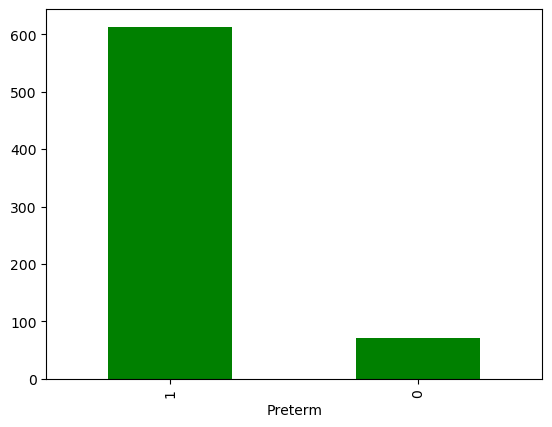

In [49]:
df1['Preterm'].value_counts().plot.bar(color='green')

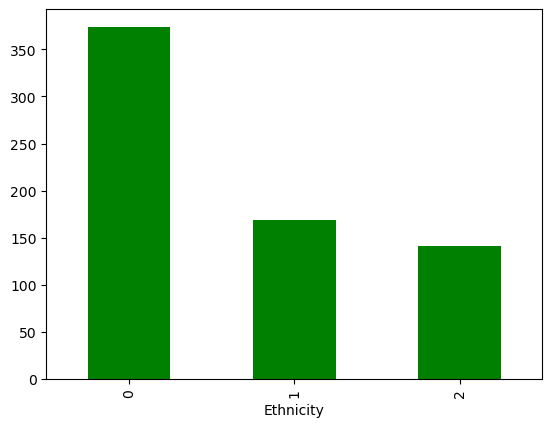

In [50]:
df1['Ethnicity'].value_counts().plot.bar(color='green')

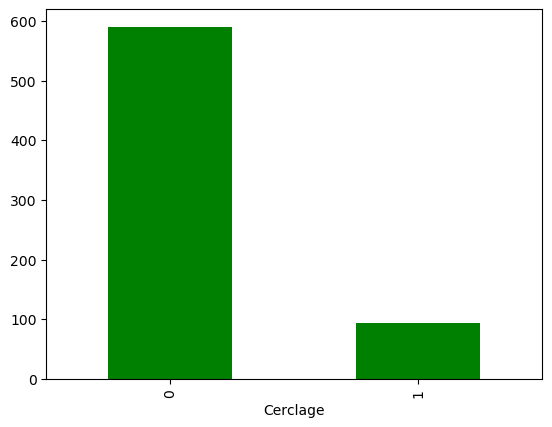

In [51]:
df1['Cerclage'].value_counts().plot.bar(color='green')

In [52]:
df1

,Age,Ethnicity,13+0-15+6 weeks,16+0–18+6 weeks,20+0-22+6 weeks,Gestation at spon delivery,Preterm,Cerclage
1,40.688889,2,31.000000,31.00,30.000000,41.0,1,0
2,20.000000,2,33.000000,32.00,32.000000,38.0,1,0
3,33.338889,2,34.000000,32.00,38.000000,40.0,1,0
4,34.963889,0,33.000000,33.00,36.000000,39.0,1,0
5,21.816667,0,34.000000,36.00,33.000000,41.0,1,0
...,...,...,...,...,...,...,...,...
720,39.500000,0,31.500000,30.50,26.666667,41.0,1,0
721,35.000000,0,35.333333,32.25,30.350000,42.0,1,0
723,34.000000,0,17.000000,33.50,35.516667,39.0,1,1
724,36.000000,0,31.000000,33.00,37.000000,40.0,1,0


**Train Test Split**

In [53]:
y = df1['Preterm']
X = df1.drop(columns = 'Preterm')

In [54]:
df1['Preterm'].value_counts()

Preterm
1    613
0     71
Name: count, dtype: int64

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20, stratify = y)

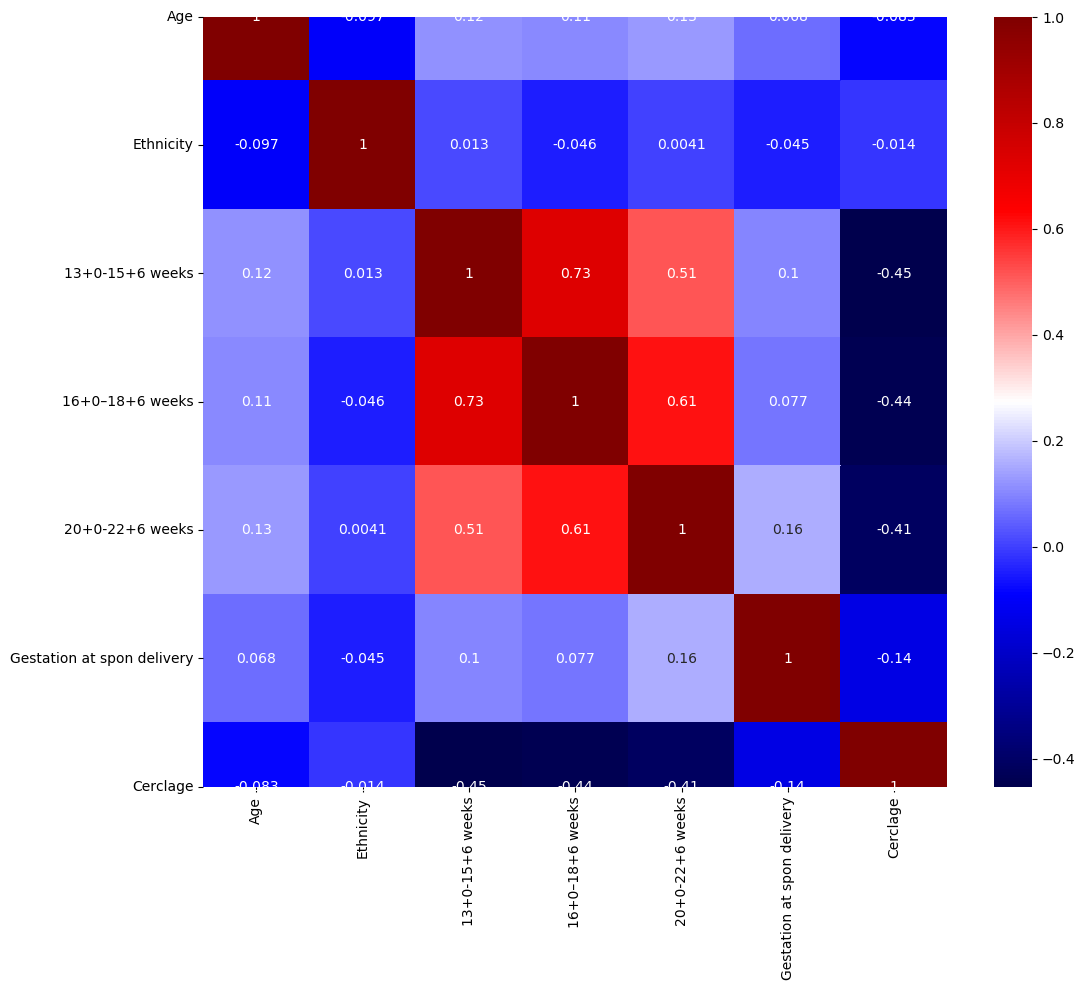

In [56]:
corr = X_train.corr()
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot = True, cmap = "seismic");

**Min Max Scaling**

In [57]:
# We need to scale correctly (We will use MinMax Scaler to do this)
from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ['Age', 'Ethnicity', '13+0-15+6 weeks', '16+0–18+6 weeks', '20+0-22+6 weeks', 'Gestation at spon delivery']
scaler = MinMaxScaler()
scaler.fit(X_train[cols_to_scale])
X_train[cols_to_scale] = scaler.transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

In [58]:
X_train.head()

,Age,Ethnicity,13+0-15+6 weeks,16+0–18+6 weeks,20+0-22+6 weeks,Gestation at spon delivery,Cerclage
686,0.607143,0.0,0.436889,0.429439,0.569266,0.866667,0
64,0.324901,0.0,0.398593,0.407288,0.454097,0.800000,0
474,0.535714,1.0,0.562720,0.600214,0.592300,0.866667,0
502,0.732143,0.5,0.492380,0.535906,0.533070,0.533333,0
572,0.464286,0.0,0.745604,0.767417,0.671273,0.866667,0


**Logistic Regression**

W/O Hyper Tun



In [59]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(solver='liblinear',random_state=500)

In [60]:
xtrain=np.array(X_train)
ytrain=np.array(y_train)
logreg.fit(xtrain,ytrain.reshape(-1,))

LogisticRegression(random_state=500, solver='liblinear')

In [61]:
logisticTestAccuracy=logreg.score(X_test,y_test)
logisticTrainAccuracy=logreg.score(X_train,y_train)
print(logisticTestAccuracy)
print(logisticTrainAccuracy)

0.9124087591240876
0.9140767824497258


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [62]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Test
lr_probs = logreg.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(y_test, lr_probs)
print('Without Hyper Tuning Logistic: Logistic Regression ROC AUC Test=%.3f' % (lr_auc))


# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)


# Train
lr_probs = logreg.predict_proba(X_train)
lr_probs = lr_probs[:, 1]
lr_auc_tr = roc_auc_score(y_train, lr_probs)
print('Without Hyper Tuning Logistic: Logistic Regression ROC AUC Train=%.3f' % (lr_auc_tr))

Without Hyper Tuning Logistic: Logistic Regression ROC AUC Test=0.994
Without Hyper Tuning Logistic: Logistic Regression ROC AUC Train=0.995


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [63]:
from sklearn.metrics import confusion_matrix

print("Test without hyper parameter tuning - Logistic Regression")
Logpred = logreg.predict(X_test)
confusion_matrixLR = confusion_matrix(y_test, Logpred)
print(confusion_matrixLR)

print("Train without hyper parameter tuning - Logistic Regression")
LogpredTrain = logreg.predict(X_train)
confusion_matrixLR_train = confusion_matrix(y_train, LogpredTrain)
print(confusion_matrixLR_train)

Test without hyper parameter tuning - Logistic Regression
[[  2  12]
 [  0 123]]
Train without hyper parameter tuning - Logistic Regression
[[ 10  47]
 [  0 490]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


**W/ Hyper Tun**

In [64]:
# https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

param_grid_LogReg = {'solver': solvers, 'penalty': penalty, 'C':c_values}
print(param_grid_LogReg)

{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'penalty': ['l2'], 'C': [100, 10, 1.0, 0.1, 0.01]}


In [65]:
from sklearn.model_selection import GridSearchCV
logreg_hyper = LogisticRegression()
logreg_grid_cv = GridSearchCV(estimator=logreg_hyper, param_grid=param_grid_LogReg, cv=10, n_jobs=-1, verbose=2)

logreg_grid_cv.fit(xtrain,ytrain.reshape(-1,))
best_log_reg_grid = logreg_grid_cv.best_estimator_
best_log_reg_grid

Fitting 10 folds for each of 25 candidates, totalling 250 fits


LogisticRegression(C=100, solver='newton-cg')

In [66]:
logreg_hyper = LogisticRegression(C=100, solver='newton-cg')
logreg_hyper.fit(X_train,y_train)
logisticTestHyperAccuracy=logreg_hyper.score(X_test,y_test)
logisticTrainHyperAccuracy=logreg_hyper.score(X_train,y_train)
print(logisticTestAccuracy)
print(logisticTrainAccuracy)

0.9124087591240876
0.9140767824497258


In [67]:
# Test
lr_probs_af = logreg_hyper.predict_proba(X_test)
lr_probs_af = lr_probs_af[:, 1]
lr_auc_af = roc_auc_score(y_test, lr_probs_af)
print('With Hyper Tuning Logistic: Logistic Regression ROC AUC Test=%.3f' % (lr_auc_af))


# calculate roc curves
lr_fpr_af, lr_tpr_af, _af = roc_curve(y_test, lr_probs_af)


# Train
lr_probs_tr_af = logreg_hyper.predict_proba(X_train)
lr_probs_tr_af = lr_probs_tr_af[:, 1]
lr_auc_tr_af = roc_auc_score(y_train, lr_probs_tr_af)
print('With Hyper Tuning Logistic: Logistic Regression ROC AUC Train=%.3f' % (lr_auc_tr_af))

With Hyper Tuning Logistic: Logistic Regression ROC AUC Test=1.000
With Hyper Tuning Logistic: Logistic Regression ROC AUC Train=1.000


In [68]:
print("Test with hyper parameter tuning - Logistic Regression")
LogpredHyper = logreg_hyper.predict(X_test)
confusion_matrixLR = confusion_matrix(y_test, Logpred)
print(confusion_matrixLR)

print("Train with hyper parameter tuning - Logistic Regression")
LogpredTrainHyper = logreg_hyper.predict(X_train)
confusion_matrixLR_train = confusion_matrix(y_train, LogpredTrainHyper)
print(confusion_matrixLR_train)

Test with hyper parameter tuning - Logistic Regression
[[  2  12]
 [  0 123]]
Train with hyper parameter tuning - Logistic Regression
[[ 53   4]
 [  0 490]]


**Random Forest**

W/O Hyper Tun

In [69]:
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier(n_estimators=2)

In [70]:
random.fit(X_train,y_train.ravel())

RandomForestClassifier(n_estimators=2)

In [71]:
randomTestAccuracy=random.score(X_test,y_test)
randomTrainAccuracy=random.score(X_train,y_train)
print(randomTestAccuracy)
print(randomTrainAccuracy)

0.9781021897810219
0.9817184643510055


In [72]:
# Test
rf_probs = random.predict_proba(X_test)
rf_probs = rf_probs[:, 1]
rf_auc = roc_auc_score(y_test, rf_probs)
print('Without Hyper Tuning Logistic: Random Forest ROC AUC Test=%.3f' % (rf_auc))

# calculate roc curves
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

# Train
rf_probs = random.predict_proba(X_train)
rf_probs = rf_probs[:, 1]
rf_auc = roc_auc_score(y_train, rf_probs)
print('Without Hyper Tuning Logistic: Random Forest ROC AUC Train=%.3f' % (rf_auc))

Without Hyper Tuning Logistic: Random Forest ROC AUC Test=0.997
Without Hyper Tuning Logistic: Random Forest ROC AUC Train=0.999


In [73]:
print("Test without hyper parameter tuning - Random Forest")
Randompred = random.predict(X_test)
confusion_matrixRF = confusion_matrix(y_test, Randompred)
print(confusion_matrixRF)

print("Train without hyper parameter tuning - Random Forest")
RandompredTrain = random.predict(X_train)
confusion_matrixRF_train = confusion_matrix(y_train, RandompredTrain)
print(confusion_matrixRF_train)

Test without hyper parameter tuning - Random Forest
[[ 14   0]
 [  3 120]]
Train without hyper parameter tuning - Random Forest
[[ 57   0]
 [ 10 480]]


**W/ Hyper Tun**

In [74]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 10)] # Less
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree

max_depth = [int(x) for x in np.linspace(10, 1000, 10)] # Less
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8]
# Create the random grid
param_grid_random_ff = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(param_grid_random_ff)

{'n_estimators': [50, 266, 483, 700, 916, 1133, 1350, 1566, 1783, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [75]:
random_forest_hyper = RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=50)
random_forest_hyper.fit(X_train,y_train.ravel())

randomTestHyperAccuracy=random_forest_hyper.score(X_test,y_test)
randomTrainHyperAccuracy=random_forest_hyper.score(X_train,y_train)
print(randomTestHyperAccuracy)
print(randomTrainHyperAccuracy)

1.0
1.0


In [76]:
# Test
rf_probs_af = random_forest_hyper.predict_proba(X_test)
rf_probs_af = rf_probs_af[:, 1]
rf_auc_af = roc_auc_score(y_test, rf_probs_af)
print('With Hyper Tuning Logistic: Random Forest ROC AUC Test=%.3f' % (rf_auc_af))


# calculate roc curves
rf_fpr_af, rf_tpr_af, _af = roc_curve(y_test, rf_probs_af)


# Train
rf_probs_tr_af = random_forest_hyper.predict_proba(X_train)
rf_probs_tr_af = rf_probs_tr_af[:, 1]
rf_auc_tr_af = roc_auc_score(y_train, rf_probs_tr_af)
print('With Hyper Tuning Logistic: Random Forest ROC AUC Train=%.3f' % (rf_auc_tr_af))

With Hyper Tuning Logistic: Random Forest ROC AUC Test=1.000
With Hyper Tuning Logistic: Random Forest ROC AUC Train=1.000


In [77]:
print("Test with hyper parameter tuning - Random Forest")
RandompredHyper = random_forest_hyper.predict(X_test)
confusion_matrixRF = confusion_matrix(y_test, RandompredHyper)
print(confusion_matrixRF)

print("Train with hyper parameter tuning - Random Forest")
RandompredTrainHyper = random_forest_hyper.predict(X_train)
confusion_matrixRF_train = confusion_matrix(y_train, RandompredTrainHyper)
print(confusion_matrixRF_train)

Test with hyper parameter tuning - Random Forest
[[ 14   0]
 [  0 123]]
Train with hyper parameter tuning - Random Forest
[[ 57   0]
 [  0 490]]


**Decision Tree Classifier**

W/O Hyper Tun

In [78]:
from sklearn import tree

In [79]:
dtc = tree.DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=2)
dtc.fit(X_train, y_train.ravel())

DecisionTreeClassifier(criterion='entropy', max_depth=2, splitter='random')

In [80]:
dtcTestAccuracy=dtc.score(X_test,y_test)
dtcTrainAccuracy=dtc.score(X_train,y_train)
print(dtcTestAccuracy)
print(dtcTrainAccuracy)

0.9051094890510949
0.8994515539305301


In [81]:
DTCpred=dtc.predict(X_test)

In [82]:
# Test
dtc_probs = dtc.predict_proba(X_test)
dtc_probs = dtc_probs[:, 1]
dtc_auc = roc_auc_score(y_test, dtc_probs)
print('Without Hyper Tuning Logistic: DT ROC AUC Test=%.3f' % (dtc_auc))

# calculate roc curves
dtc_fpr, dtc_tpr, _ = roc_curve(y_test, dtc_probs)

# Train
dtc_probs = dtc.predict_proba(X_train)
dtc_probs = dtc_probs[:, 1]
dtc_auc = roc_auc_score(y_train, dtc_probs)
print('Without Hyper Tuning Logistic: DT ROC AUC Train=%.3f' % (dtc_auc))

Without Hyper Tuning Logistic: DT ROC AUC Test=0.796
Without Hyper Tuning Logistic: DT ROC AUC Train=0.797


In [83]:
print("Test without hyper parameter tuning - DT")
DTpred = dtc.predict(X_test)
confusion_matrixDT = confusion_matrix(y_test, DTpred)
print(confusion_matrixDT)

print("Train without hyper parameter tuning - DT")
DTpredTrain = dtc.predict(X_train)
confusion_matrixDT_train = confusion_matrix(y_train, DTpredTrain)
print(confusion_matrixDT_train)

Test without hyper parameter tuning - DT
[[  1  13]
 [  0 123]]
Train without hyper parameter tuning - DT
[[  2  55]
 [  0 490]]


**W/ Hyper Tun**

In [84]:
dtc_hyper = tree.DecisionTreeClassifier(criterion='gini', max_features='auto', max_leaf_nodes=15, min_samples_split=3, splitter='best')

dtc_hyper.fit(X_train, y_train.ravel())

dtcHyperTestAccuracy=dtc_hyper.score(X_test,y_test)
dtcHyperTrainAccuracy=dtc_hyper.score(X_train,y_train)
print(dtcHyperTestAccuracy)
print(dtcHyperTrainAccuracy)

1.0
1.0


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [85]:
# Test
dtc_probs_af = dtc_hyper.predict_proba(X_test)
dtc_probs_af = dtc_probs_af[:, 1]
dtc_auc_af = roc_auc_score(y_test, dtc_probs_af)
print('With Hyper Tuning Logistic: DT ROC AUC Test=%.3f' % (dtc_auc))

# calculate roc curves
dtc_fpr_af, dtc_tpr_af, _af = roc_curve(y_test, dtc_probs_af)

# Train
dtc_probs_tr_af = dtc_hyper.predict_proba(X_train)
dtc_probs_tr_af = dtc_probs_tr_af[:, 1]
dtc_auc_tr_af = roc_auc_score(y_train, dtc_probs_tr_af)
print('With Hyper Tuning Logistic: DT ROC AUC Train=%.3f' % (dtc_auc_tr_af))

With Hyper Tuning Logistic: DT ROC AUC Test=0.797
With Hyper Tuning Logistic: DT ROC AUC Train=1.000


In [86]:
print("Test with hyper parameter tuning - DT")
DTpredHyper = dtc_hyper.predict(X_test)
confusion_matrixDT = confusion_matrix(y_test, DTpredHyper)
print(confusion_matrixDT)

print("Train with hyper parameter tuning - DT")
DTpredTrainHyper = dtc_hyper.predict(X_train)
confusion_matrixDT_train = confusion_matrix(y_train, DTpredTrainHyper)
print(confusion_matrixDT_train)

Test with hyper parameter tuning - DT
[[ 14   0]
 [  0 123]]
Train with hyper parameter tuning - DT
[[ 57   0]
 [  0 490]]


**Comparision**

Comparision with Hyperparameter

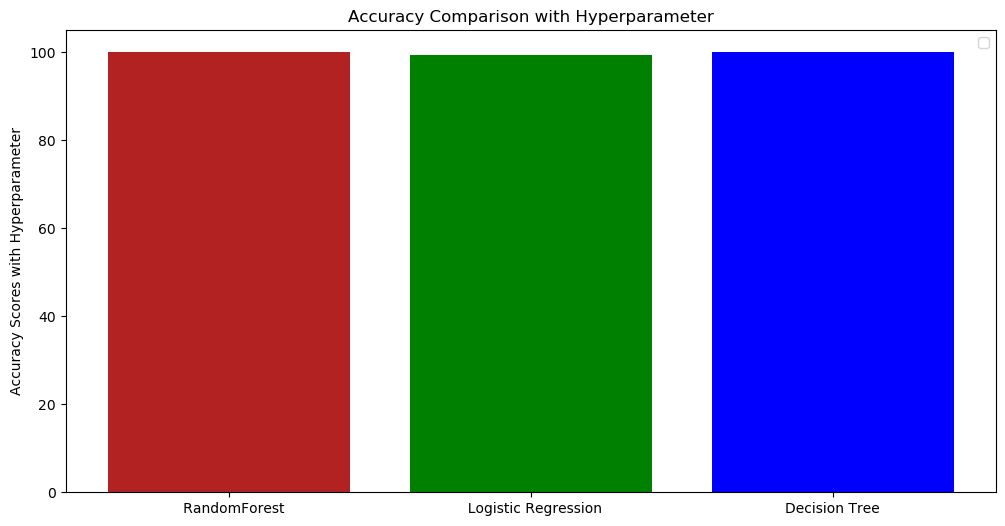

In [87]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(12, 6), dpi=100)
x1 = np.array(["   RandomForest ", "  Logistic Regression","Decision Tree"])
y1 = np.array([randomTrainHyperAccuracy*100,logisticTrainHyperAccuracy*100,dtcHyperTrainAccuracy*100])
plt.ylabel('Accuracy Scores with Hyperparameter')
plt.title('Accuracy Comparison with Hyperparameter')
plt.bar(x1,y1,color=['firebrick', 'green','blue'])
plt.legend()
plt.show()

Comparision without Hyperparameter

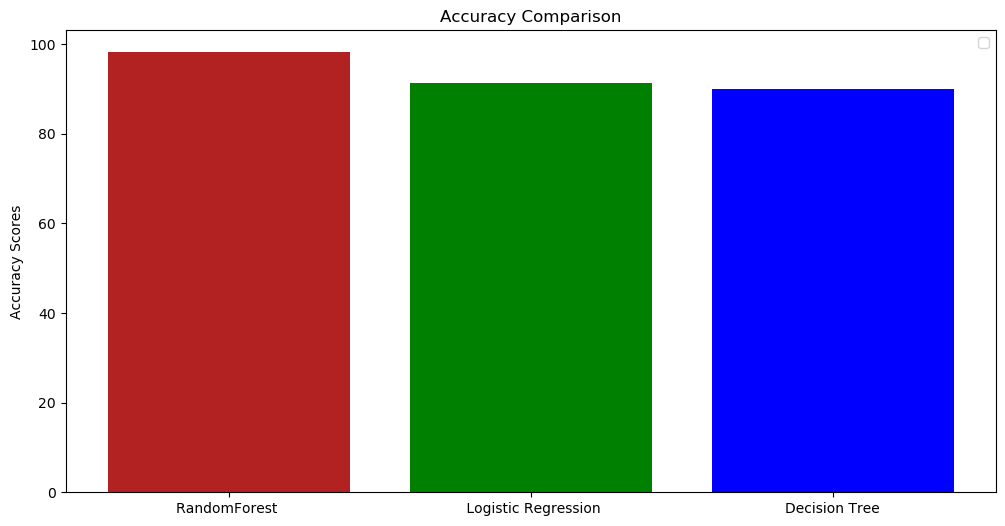

In [88]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(12, 6), dpi=100)
x1 = np.array(["RandomForest ", " Logistic Regression","Decision Tree"])
y1 = np.array([randomTrainAccuracy*100,logisticTrainAccuracy*100,dtcTrainAccuracy*100])
plt.ylabel('Accuracy Scores')
plt.title('Accuracy Comparison')
plt.bar(x1,y1,color=['firebrick', 'green','blue'])
plt.legend()
plt.show()

**Performance Analysis**

ROC Before Hyper-tuning



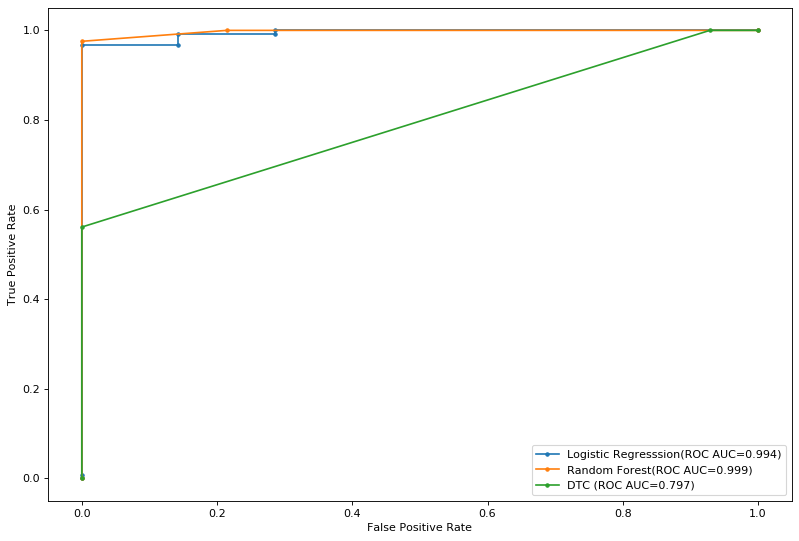

In [89]:
from matplotlib import pyplot
from matplotlib.pyplot import figure
figure(figsize=(12, 8), dpi=80)
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regresssion(ROC AUC=%.3f)' % (lr_auc))
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest(ROC AUC=%.3f)' % (rf_auc))
pyplot.plot(dtc_fpr, dtc_tpr, marker='.', label='DTC (ROC AUC=%.3f)' % (dtc_auc))
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

**ROC After Hyper-tuning**

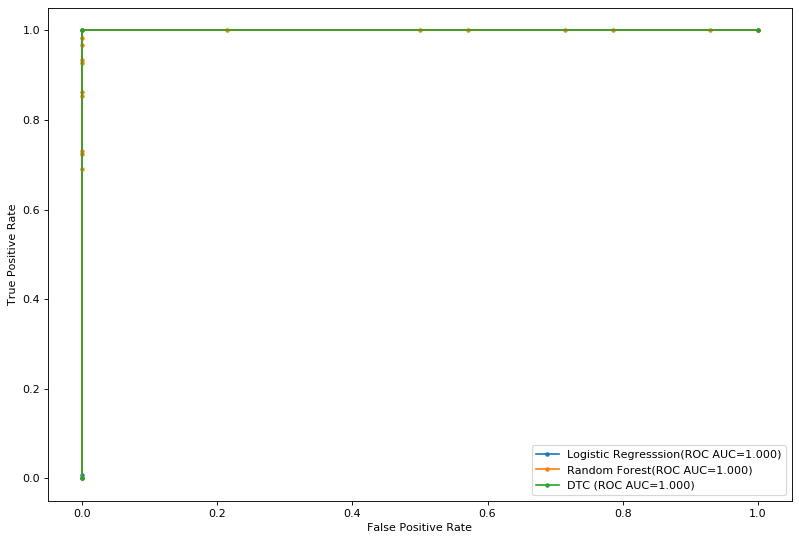

In [90]:
figure(figsize=(12, 8), dpi=80)
pyplot.plot(lr_fpr_af, lr_tpr_af, marker='.', label='Logistic Regresssion(ROC AUC=%.3f)' % (lr_auc_af))
pyplot.plot(rf_fpr_af, rf_tpr_af, marker='.', label='Random Forest(ROC AUC=%.3f)' % (rf_auc_af))
pyplot.plot(dtc_fpr_af, dtc_tpr_af, marker='.', label='DTC (ROC AUC=%.3f)' % (dtc_auc_af))
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

**Classification Report**

Without Hyperparameter

In [91]:
from sklearn.metrics import classification_report
print("TEST")
print("Logistic Regration")
print(classification_report(y_test,Logpred))
print("Random Forest")
print(classification_report(y_test,Randompred))
print("Decision Tree")
print(classification_report(y_test,DTCpred))

print("TRAIN")
print("Logistic Regration")
print(classification_report(y_train,LogpredTrain))
print("Random Forest")
print(classification_report(y_train,RandompredTrain))
print("Decision Tree")
print(classification_report(y_train,DTpredTrain))

TEST
Logistic Regration
              precision    recall  f1-score   support

           0       1.00      0.14      0.25        14
           1       0.91      1.00      0.95       123

    accuracy                           0.91       137
   macro avg       0.96      0.57      0.60       137
weighted avg       0.92      0.91      0.88       137

Random Forest
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        14
           1       1.00      0.98      0.99       123

    accuracy                           0.98       137
   macro avg       0.91      0.99      0.95       137
weighted avg       0.98      0.98      0.98       137

Decision Tree
              precision    recall  f1-score   support

           0       1.00      0.07      0.13        14
           1       0.90      1.00      0.95       123

    accuracy                           0.91       137
   macro avg       0.95      0.54      0.54       137
weighted avg       0.9

**With HyperParameter**

In [92]:
from sklearn.metrics import classification_report
print("TEST")
print("Logistic Regration")
print(classification_report(y_test,LogpredHyper))
print("Random Forest")
print(classification_report(y_test,RandompredHyper))
print("Decision Tree")
print(classification_report(y_test,DTpredHyper))

print("TRAIN")
print("Logistic Regration")
print(classification_report(y_train,LogpredTrainHyper))
print("Random Forest")
print(classification_report(y_train,RandompredTrainHyper))
print("Decision Tree")
print(classification_report(y_train,DTpredTrainHyper))

TEST
Logistic Regration
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00       123

    accuracy                           1.00       137
   macro avg       1.00      1.00      1.00       137
weighted avg       1.00      1.00      1.00       137

Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00       123

    accuracy                           1.00       137
   macro avg       1.00      1.00      1.00       137
weighted avg       1.00      1.00      1.00       137

Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00       123

    accuracy                           1.00       137
   macro avg       1.00      1.00      1.00       137
weighted avg       1.0

In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [94]:
df= pd.read_csv('/content/preterm.csv')

In [95]:
df.head()

,Count Contraction,lenght of contraction,STD,Entropy,Contraction times,Pre-term
0,11055,218320,53231.010,1.860,2,1
1,9118,222820,62367.488,1.580,2,1
2,7925,13481,60503.050,2.067,2,1
3,12451,17474,53628.078,1.731,2,1
4,11152,218320,53317.910,1.857,2,1


In [96]:
df = df.drop_duplicates()

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57 entries, 0 to 57
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Count Contraction      57 non-null     int64  
 1   lenght of contraction  57 non-null     int64  
 2   STD                    57 non-null     float64
 3   Entropy                57 non-null     float64
 4   Contraction times      57 non-null     int64  
 5   Pre-term               57 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 3.1 KB


In [98]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Count Contraction,57.0,2512.438596,3821.742366,222.000,398.000,495.000,1919.00,12452.000
lenght of contraction,57.0,26870.017544,62045.428533,2308.000,2641.000,3355.000,11481.00,228321.000
STD,57.0,48839.759211,8782.195737,29205.840,42902.890,49406.860,54431.03,63467.583
Entropy,57.0,0.879386,0.532868,0.428,0.488,0.581,1.21,2.067
Contraction times,57.0,0.631579,0.815729,0.000,0.000,0.000,1.00,2.000
Pre-term,57.0,0.315789,0.468961,0.000,0.000,0.000,1.00,1.000


In [99]:
df.nunique()

Count Contraction        44
lenght of contraction    46
STD                      49
Entropy                  47
Contraction times         3
Pre-term                  2
dtype: int64

In [100]:
def plot_countplot(col_name:str):
    plt.figure(figsize=(10,6))
    sns.countplot(df[col_name], data=df, palette='flare')
    plt.show()

In [101]:
def plot_barplot(col_name_1:str, col_name_2:str):
    plt.figure(figsize=(10,6))
    sns.barplot(y = df[col_name_1], x = df[col_name_2], data=df, palette='flare')
    plt.show()

In [102]:
def plot_circleplot(col_name:str):
    label_data = df['Contraction times'].value_counts()


    plt.figure(figsize=(20, 10))
    patches, texts, pcts = plt.pie(label_data,
                                labels = label_data.index,
                                pctdistance = 0.65,
                                colors = ['orange', 'pink', 'purple'],
                                autopct = '%1.1f%%',
                                textprops={ 'fontsize': 25,
                                            'color': 'white',
                                            'weight': 'bold',
                                            'family': 'serif' })
    plt.setp(pcts, color='black')

    hfont = {'fontname':'serif', 'weight': 'bold', 'color':'white'}
    plt.title('Contraction Times', size=20, **hfont)

    centre_circle = plt.Circle((0,0),0.40,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.show()

In [103]:
def plot_histplot(col_name:str):
    plt.figure(figsize=(10,6))
    sns.histplot(df['Entropy'], bins = 20, kde = True)
    plt.title(f'{col_name} - Count Plot')
    plt.show()

In [104]:
def plot_lineplot(col_name_1:str, col_name_2:str):
    plt.figure(figsize=(10,6))
    sns.lineplot(y = df[col_name_2], x = df[col_name_1], data=df)
    plt.show()

In [105]:
def plot_scatterplot(col_name_1:str, col_name_2:str):
    plt.figure(figsize=(10,6))
    sns.scatterplot(y = df[col_name_2], x = df[col_name_1], data=df)
    plt.show()

In [106]:
print(f'''
---------- Contraction Times Summary ----------
Unique: \n{df['Contraction times'].unique()}

Value Counts: \n{df['Contraction times'].value_counts()}
-----------------------------------------------
''')


---------- Contraction Times Summary ----------
Unique: 
[2 1 0]

Value Counts: 
Contraction times
0    33
2    12
1    12
Name: count, dtype: int64
-----------------------------------------------



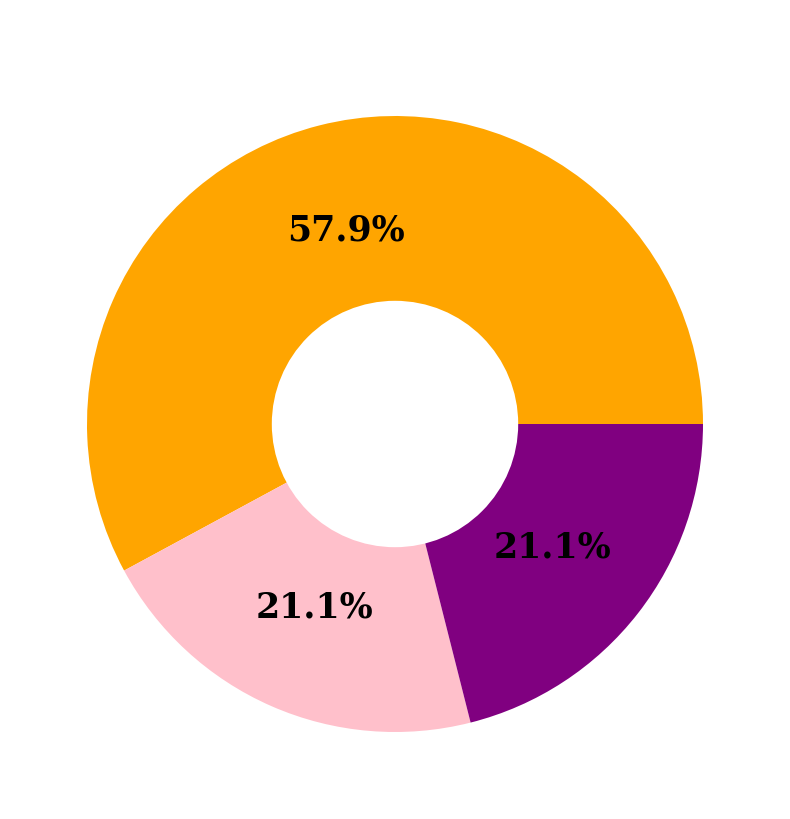

In [107]:
plot_circleplot('Contraction times')

In [108]:
print(f'''
---------- Pre-term Summary ----------
Unique: \n{df['Pre-term'].unique()}

Value Counts: \n{df['Pre-term'].value_counts()}
---------------------------------------
''')


---------- Pre-term Summary ----------
Unique: 
[1 0]

Value Counts: 
Pre-term
0    39
1    18
Name: count, dtype: int64
---------------------------------------



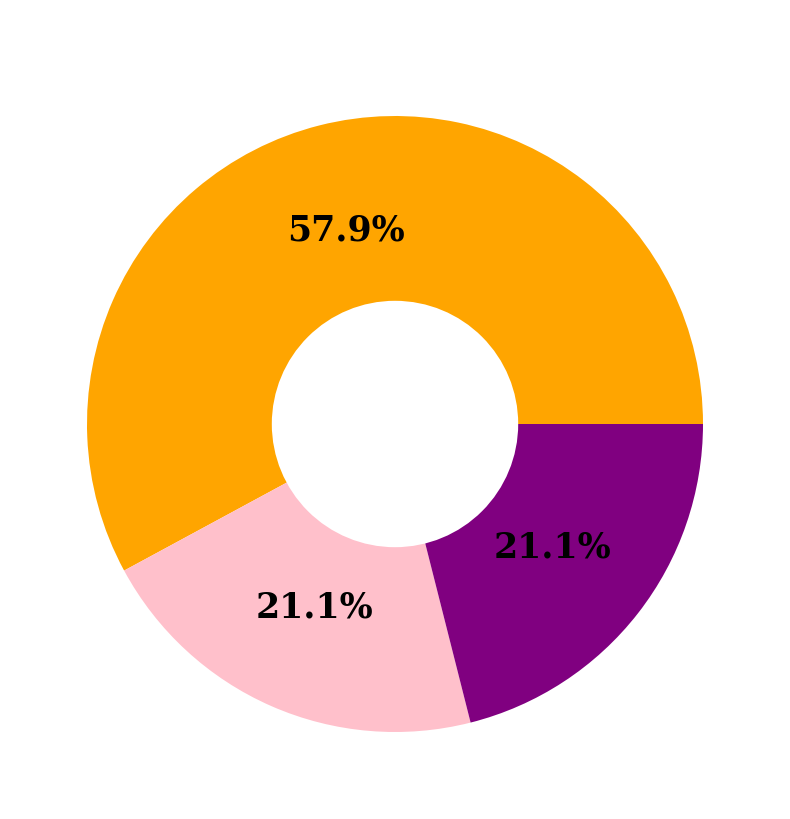

In [109]:
plot_circleplot('Pre-term')

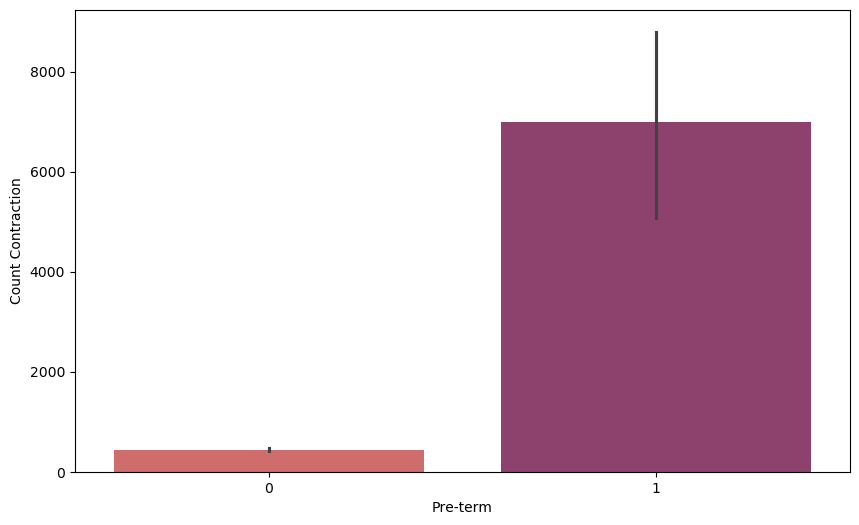

In [110]:
plot_barplot('Count Contraction', 'Pre-term')

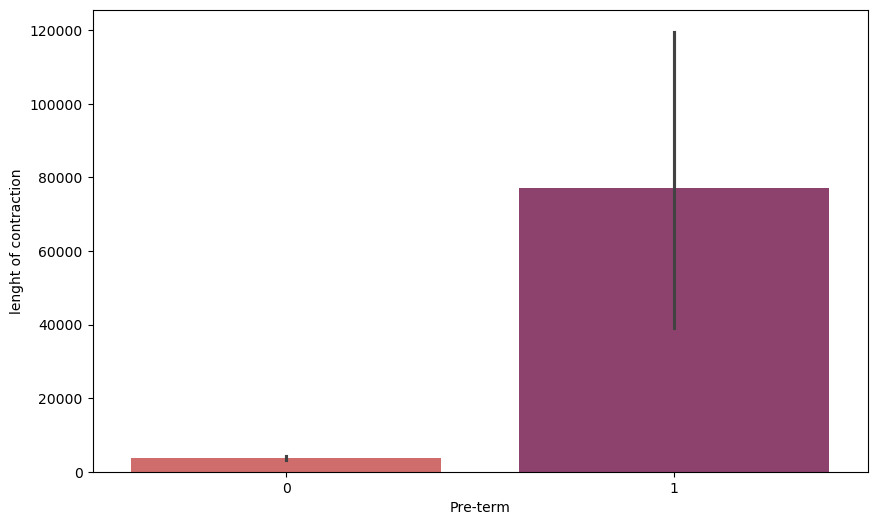

In [111]:
plot_barplot('lenght of contraction', 'Pre-term')

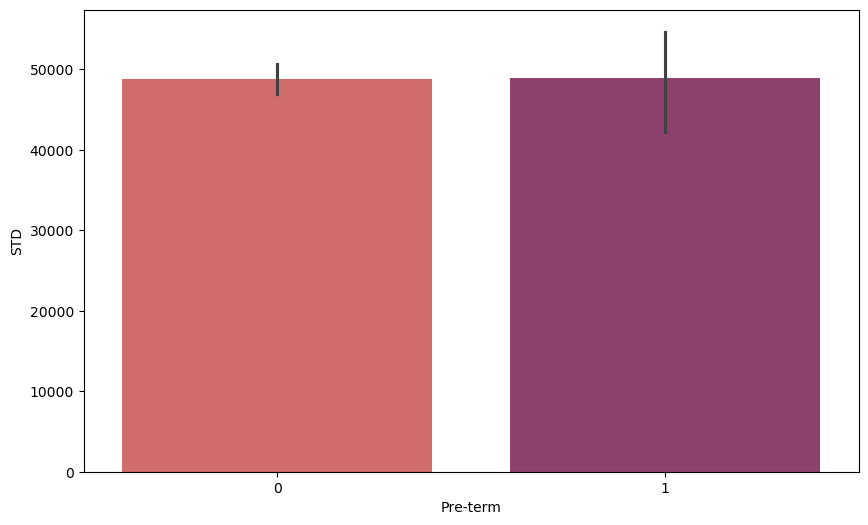

In [112]:
plot_barplot('STD', 'Pre-term')

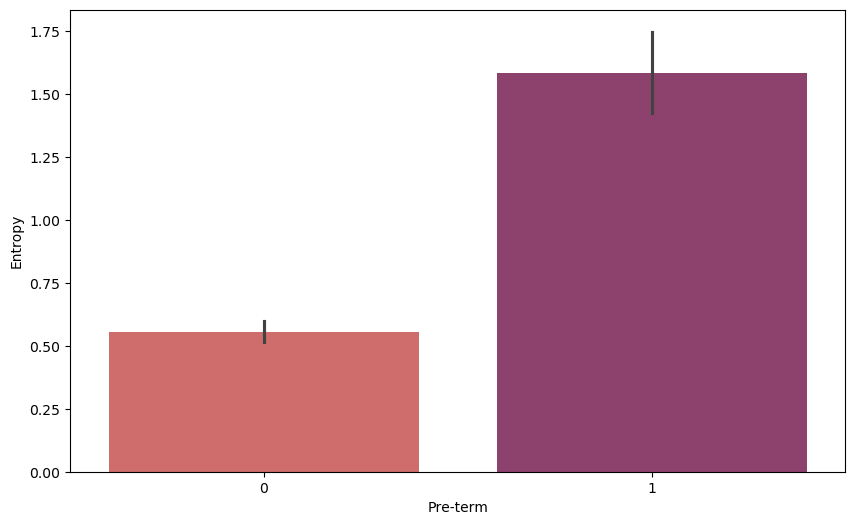

In [113]:
plot_barplot('Entropy', 'Pre-term')

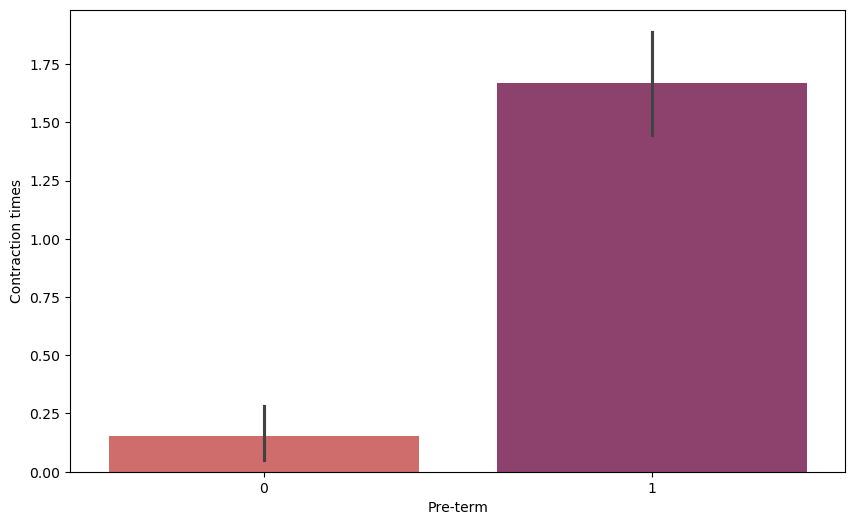

In [114]:
plot_barplot('Contraction times', 'Pre-term')

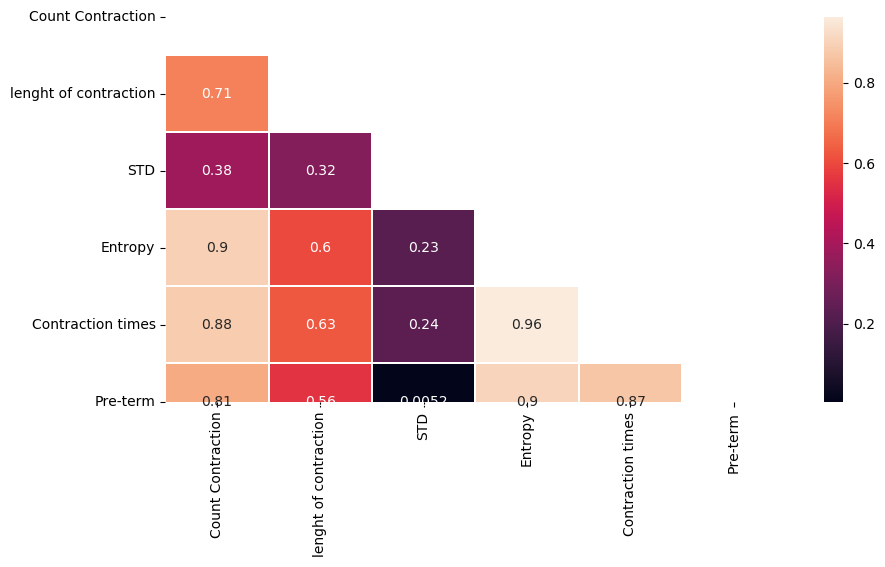

In [115]:
df_corr = df.corr()

plt.figure(figsize=(10, 5))
matrix = np.triu(df_corr)
sns.heatmap(df_corr, annot=True, linewidth=.8, mask=matrix, cmap="rocket");
plt.show()

In [116]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [117]:
df = pd.read_csv('preterm.csv')
df = df.drop_duplicates()
df.head()

,Count Contraction,lenght of contraction,STD,Entropy,Contraction times,Pre-term
0,11055,218320,53231.010,1.860,2,1
1,9118,222820,62367.488,1.580,2,1
2,7925,13481,60503.050,2.067,2,1
3,12451,17474,53628.078,1.731,2,1
4,11152,218320,53317.910,1.857,2,1


In [118]:
X = df.drop('Pre-term', axis = 1)
y = df['Pre-term']

In [119]:
X = pd.DataFrame(StandardScaler().fit_transform(X))
X.head()

,0,1,2,3,4
0,2.255122,3.113071,0.504462,1.856617,1.692456
1,1.743780,3.186243,1.554051,1.326487,1.692456
2,1.428844,-0.217712,1.339866,2.248534,1.692456
3,2.623648,-0.152784,0.550077,1.612378,1.692456
4,2.280729,3.113071,0.514445,1.850937,1.692456


In [120]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [121]:
classifier= DecisionTreeClassifier(criterion='entropy', random_state=42)
classifier.fit(x_train, y_train);
y_pred= classifier.predict(x_test)

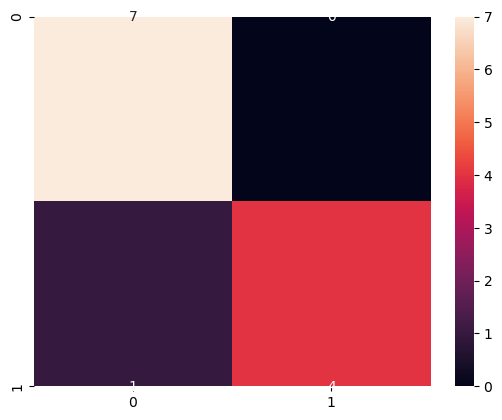

In [122]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
plt.show()

In [123]:
print("\n Classification report for classifier %s:\n%s\n" % (classifier, metrics.classification_report(y_test, y_pred)))


 Classification report for classifier DecisionTreeClassifier(criterion='entropy', random_state=42):
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.80      0.89         5

    accuracy                           0.92        12
   macro avg       0.94      0.90      0.91        12
weighted avg       0.93      0.92      0.91        12




In [124]:
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(x_train, y_train);

y_pred = rfc.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 100.00%


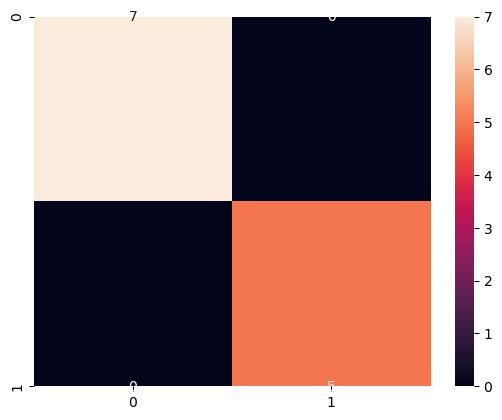

In [125]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
plt.show()

In [126]:
print("\n Classification report for classifier %s:\n%s\n" % (rfc, metrics.classification_report(y_test, y_pred)))



 Classification report for classifier RandomForestClassifier(n_estimators=10, random_state=42):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         5

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12




In [127]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(x_train, y_train)

y_pred = lr_model.predict(x_test)

accuracy = lr_model.score(x_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 100.00%


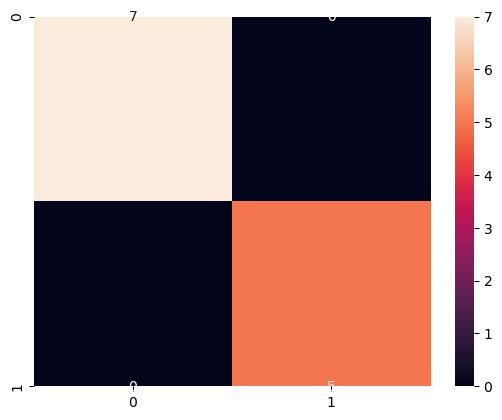

In [128]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
plt.show()

In [129]:
print("\n Classification report for classifier %s:\n%s\n" % (lr_model, metrics.classification_report(y_test, y_pred)))


 Classification report for classifier LogisticRegression(random_state=42):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         5

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12




In [133]:
def predict_preterm(age,e,gestation1, gestation2, gestation3,gest,c):
    try:
        x = np.zeros(len(X.columns))
        x[0] = age
        x[1]=e
        x[2] = gestation1
        x[3] = gestation2
        x[4] = gestation3
        x[5]=gest
        x[6]=c
        return  dtc_hyper.predict([x])[0]
    except:
        print("")
        return 0
pred1 = -1
while pred1 ==-1:
    try:
        age=float(input("Enter your age:"))
        ee=int(input("Enter your ethinicity:"))
        g1 = float(input("Enter gestation1: "))
        g2 = float(input("Enter gestation2: "))
        g3 = float(input("Enter gestation3: "))
        g=float(input("Enter gestation: "))
        ce=int(input("Enter your cerclage:"))
        pred1 = predict_preterm(age,ee,g1, g2, g3,g,ce)
    except:
        print("Please check input data type")


Enter your age:33
Enter your ethinicity:2
Enter gestation1: 26
Enter gestation2: 24
Enter gestation3: 0
Enter gestation: 37
Enter your cerclage:1



In [136]:
def predict_preterm(cc,lc,std,e,c):
    try:
        x = np.zeros(len(X.columns))
        x[0] = cc
        x[1] = lc
        x[2] = std
        x[3] = e
        x[4] = c
        return lr_model.predict([x])[0]
    except:
        print("Please check inputs")
        return 0

# To take inputs
pred = -1
while pred == -1:
    try:
        count=float(input("Enter your count contractions:"))
        length = float(input("Enter length of contraction: "))
        s= float(input("Enter STD "))
        en= float(input("Enter Entropy: "))
        con= float(input("Enter Contraction "))
        pred = predict_preterm(count,length,s,en,con)
    except:
        print("Please check input data type")

Enter your count contractions:465
Enter length of contraction: 3238
Enter STD 52103
Enter Entropy: 0.52
Enter Contraction 0


In [137]:
if(pred1==0 and pred==1):
    print("preterm")
else:
    print("term")

term
